# Titanic prediction with KNN

*import libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**reading csv file**

In [2]:
df = pd.read_csv('../input/traintitanicknn/train.csv')

### getting general information about data

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## plotting for more exploration

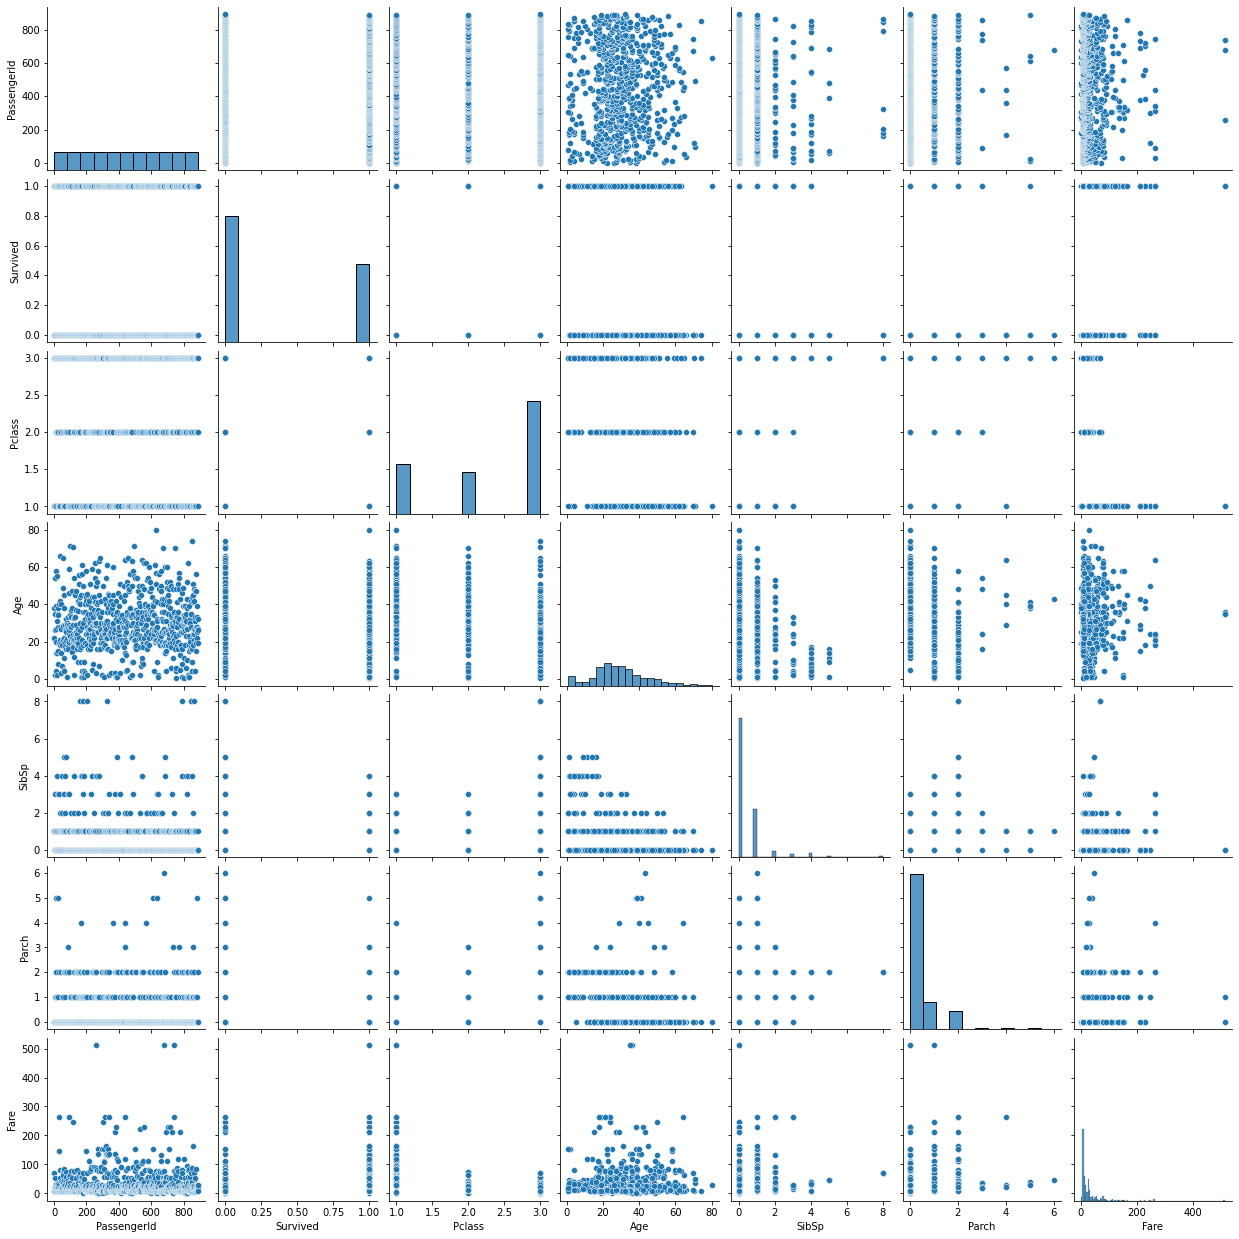

In [6]:
sns.pairplot(data=df)

**correlations**

In [7]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


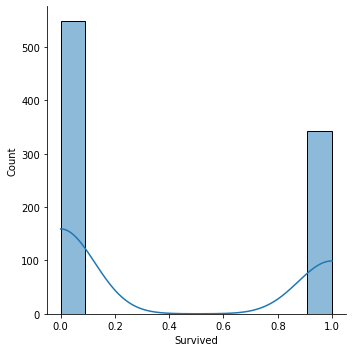

In [8]:
sns.displot(df['Survived'], kde=True)

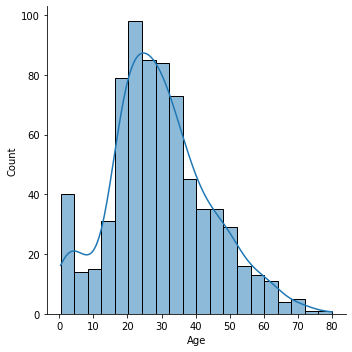

In [9]:
sns.displot(df['Age'], kde=True)

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

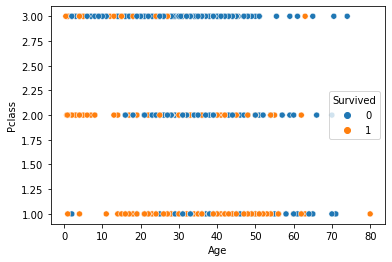

In [10]:
sns.scatterplot(data=df, x=df['Age'], y=df['Pclass'], hue=df['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

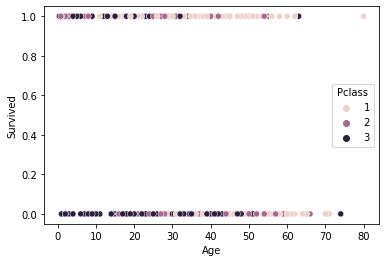

In [11]:
sns.scatterplot(data=df, x=df['Age'], y=df['Survived'], hue=df['Pclass'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

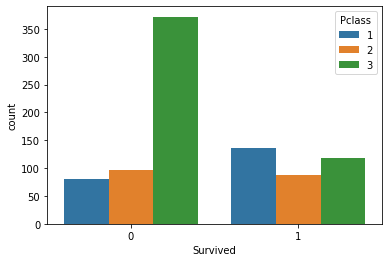

In [12]:
sns.countplot(df['Survived'], hue=df['Pclass'])

In [13]:
df.shape

(891, 12)

**creating a function to calculate null values**

In [14]:
def null_counter(df):
    null_percent = df.isna().sum() / len(df) * 100
    return null_percent

In [15]:
null = null_counter(df)
null

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### dropping columns

In [16]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

#### fill age columns `nan` values

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

drop `missing values`

In [18]:
df = df.dropna()

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### preprocessing Data

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [21]:
transformer = make_column_transformer(
    (MinMaxScaler(), ['Fare', 'Parch', 'SibSp', 'Pclass', 'Age']),
    (OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])
)

**X and y**

In [22]:
X = df.drop('Survived', axis=1)
y = df['Survived']

**train-test-split**

In [23]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15, random_state=42)

In [24]:
transformer.fit(train_x)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Fare', 'Parch', 'SibSp', 'Pclass', 'Age']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Embarked'])])

In [25]:
train_x = transformer.transform(train_x)
test_x = transformer.transform(test_x)

## Build, train and evaluate Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### creating model with diffrent number of ks to find optimal number of neighbors

In [27]:
train_scores = []
test_scores = []
for k in range(1, 10):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_x, train_y)
    train_scores.append(metrics.accuracy_score(train_y, neigh.predict(train_x)))
    test_scores.append(metrics.accuracy_score(test_y, neigh.predict(test_x)))

In [28]:
train_scores

[0.9801324503311258,
 0.8847682119205298,
 0.8768211920529801,
 0.8582781456953642,
 0.8582781456953642,
 0.8463576158940397,
 0.8463576158940397,
 0.8370860927152318,
 0.8397350993377484]

In [29]:
test_scores

[0.7686567164179104,
 0.7835820895522388,
 0.8134328358208955,
 0.8208955223880597,
 0.7985074626865671,
 0.8059701492537313,
 0.7910447761194029,
 0.7835820895522388,
 0.7910447761194029]

In [30]:
scores_dict = {
    'Train Score':train_scores,
    'Test Score':test_scores
}

pd.DataFrame(scores_dict)

,Train Score,Test Score
0,0.980132,0.768657
1,0.884768,0.783582
2,0.876821,0.813433
3,0.858278,0.820896
4,0.858278,0.798507
5,0.846358,0.805970
6,0.846358,0.791045
7,0.837086,0.783582
8,0.839735,0.791045


Text(0, 0.5, 'test score')

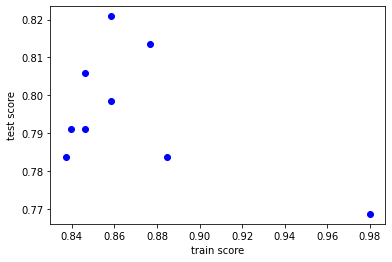

In [31]:
plt.scatter(x=train_scores, y=test_scores, color='b')
plt.xlabel('train score')
plt.ylabel('test score')

### Final Model

In [33]:
final_model = KNeighborsClassifier(n_neighbors=4)
final_model.fit(train_x, train_y)
yhat_final = final_model.predict(test_x)
yhat_train_final = final_model.predict(train_x)

#### evaluating **`Final Model`**

In [34]:
# accuracy score
metrics.accuracy_score(test_y, yhat_final)

0.8208955223880597

In [35]:
# recall
metrics.recall_score(test_y, yhat_final)

0.723404255319149

In [37]:
# precision
metrics.precision_score(test_y, yhat_final)

0.7555555555555555

In [39]:
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

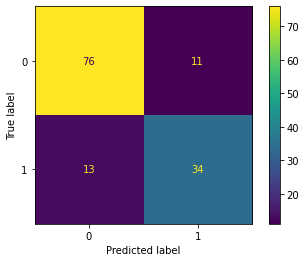

In [40]:
plot_confusion_matrix(final_model, test_x, test_y)

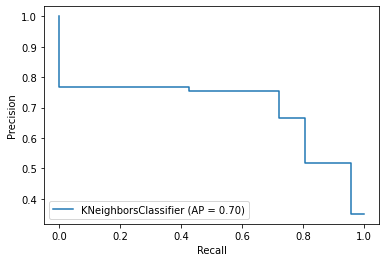

In [41]:
plot_precision_recall_curve(final_model, test_x, test_y)

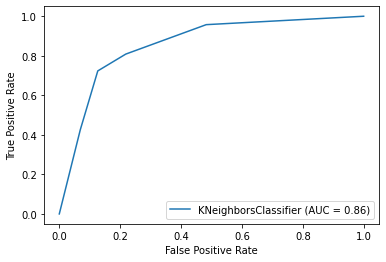

In [42]:
plot_roc_curve(final_model, test_x, test_y)